## Importing Libraries

In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import cvxpy as cp
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels import regression
from scipy.optimize import minimize

## Importing Datasets

## Selecting our Risk-free Asset

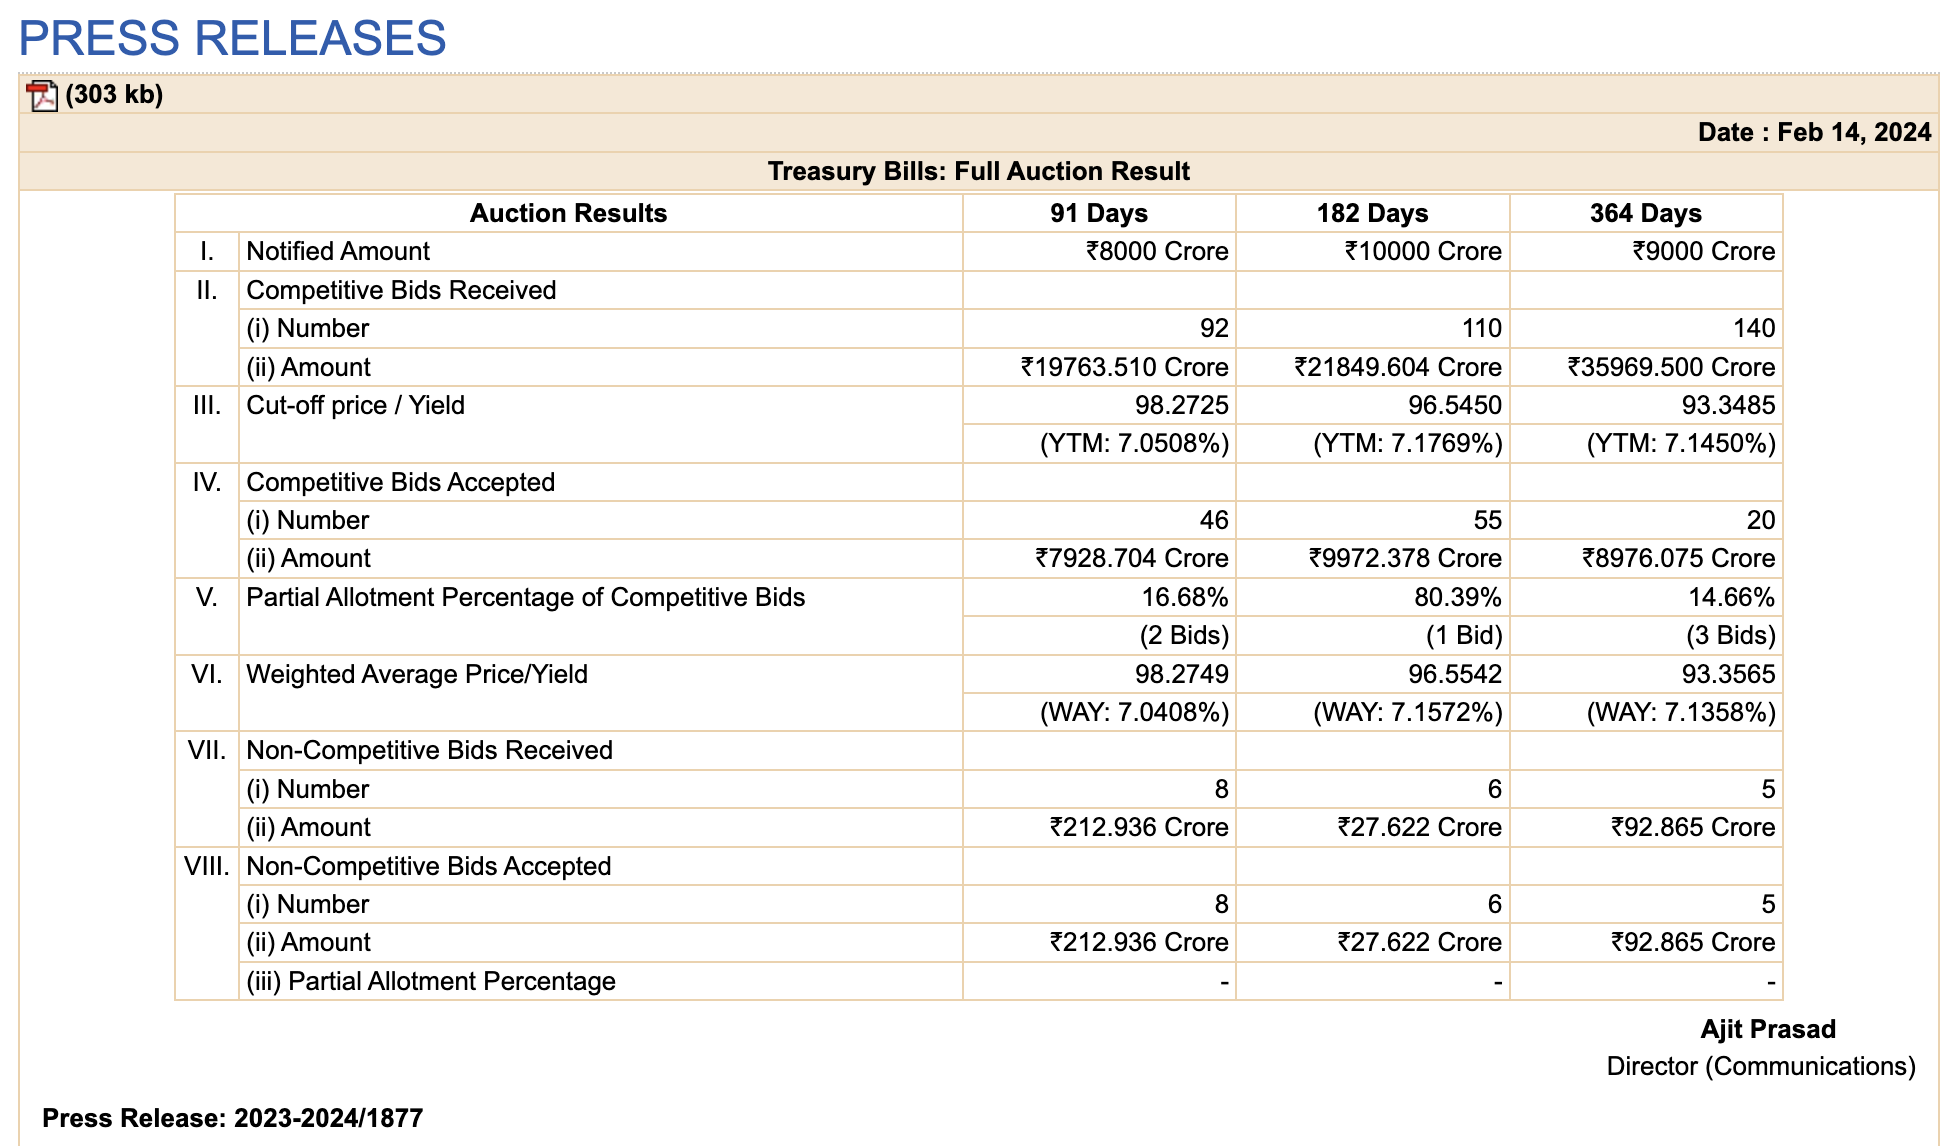

In [ ]:
# The above image shows the press release of treasury bills allotment announcement dated Feb 14, 2024.
# The "Yield" for all type of bills (91 days, 182 days and 364 days) is roughly around 7.1% p.a. (YTM).
# We will be going ahead with 91 days bill in this project, with yield = 7.05% p.a.

#### The above image shows the press release of treasury bills allotment announcement dated Feb 14, 2024. The "Yield" for all type of bills (91 days, 182 days and 364 days) is roughly around 7.1% p.a. (YTM). We will be going ahead with 91 days bill in this project, with yield = 7.05% p.a.

### Determing daily risk free return

In [ ]:
## (1 + r_rf_daily) ^ 365 = (1 + r_eff)
## r_rf_daily = (1 + r_eff) ^ (1 / 365) - 1

U_rf = (1 + 0.0705) ** (1 / 364) - 1
print("Risf-free return :- ", U_rf)

Risf-free return :-  0.00018717638632415046


## Selecting 10 risky assets from the market

In [ ]:
# Define the ticker symbols for the 10 stocks
# stocks = ['ADANIENT.NS','PVR.NS','COALINDIA.NS','INDHOTEL.NS','SUZLON.NS','ADANIPORTS.NS','ITC.NS','FINEORG.NS','SBIN.NS','MONQ50.NS']
stocks = ['TCS.NS',
          'WIPRO.NS',
          'INFY.NS',
          'ADANIPORTS.NS',
          'ICICIBANK.NS',
          'TATAMOTORS.NS',
          'ITC.NS',
          'TATAPOWER.NS',
          'VEDL.NS',
          'LT.NS']

N = len(stocks)

# Define the start and end date for the data download (last 3 months)
start_date = pd.Timestamp(year=2023, month = 10, day = 1)

# start_date = pd.Timestamp(year=2019, month = 12, day = 31) - pd.Timedelta(days=90)
end_date = pd.Timestamp(year=2023, month = 12, day = 31)

# Download the closing prices for the tickers and store in a pandas DataFrame
df = yf.download(stocks, start=start_date, end=end_date)['Close']

# Calculate the simple returns for each stock
returns = df.pct_change().dropna()

[*********************100%%**********************]  10 of 10 completed


In [ ]:
df.head()

Ticker,ADANIPORTS.NS,ICICIBANK.NS,INFY.NS,ITC.NS,LT.NS,TATAMOTORS.NS,TATAPOWER.NS,TCS.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,
2023-10-03,831.400024,940.299988,1434.000000,439.750000,3073.250000,620.450012,263.950012,3513.850098,230.750000,405.450012
2023-10-04,824.599976,930.049988,1444.349976,436.100006,3027.750000,613.599976,256.649994,3537.750000,223.399994,404.899994
2023-10-05,825.200012,940.849976,1463.449951,436.049988,3096.050049,619.599976,257.799988,3589.350098,222.000000,406.799988
2023-10-06,830.750000,945.200012,1478.699951,442.149994,3093.699951,622.450012,258.750000,3621.399902,222.699997,407.850006
2023-10-09,790.049988,938.599976,1475.449951,440.450012,3074.699951,617.349976,250.000000,3638.350098,218.949997,405.600006


## Stock price plots

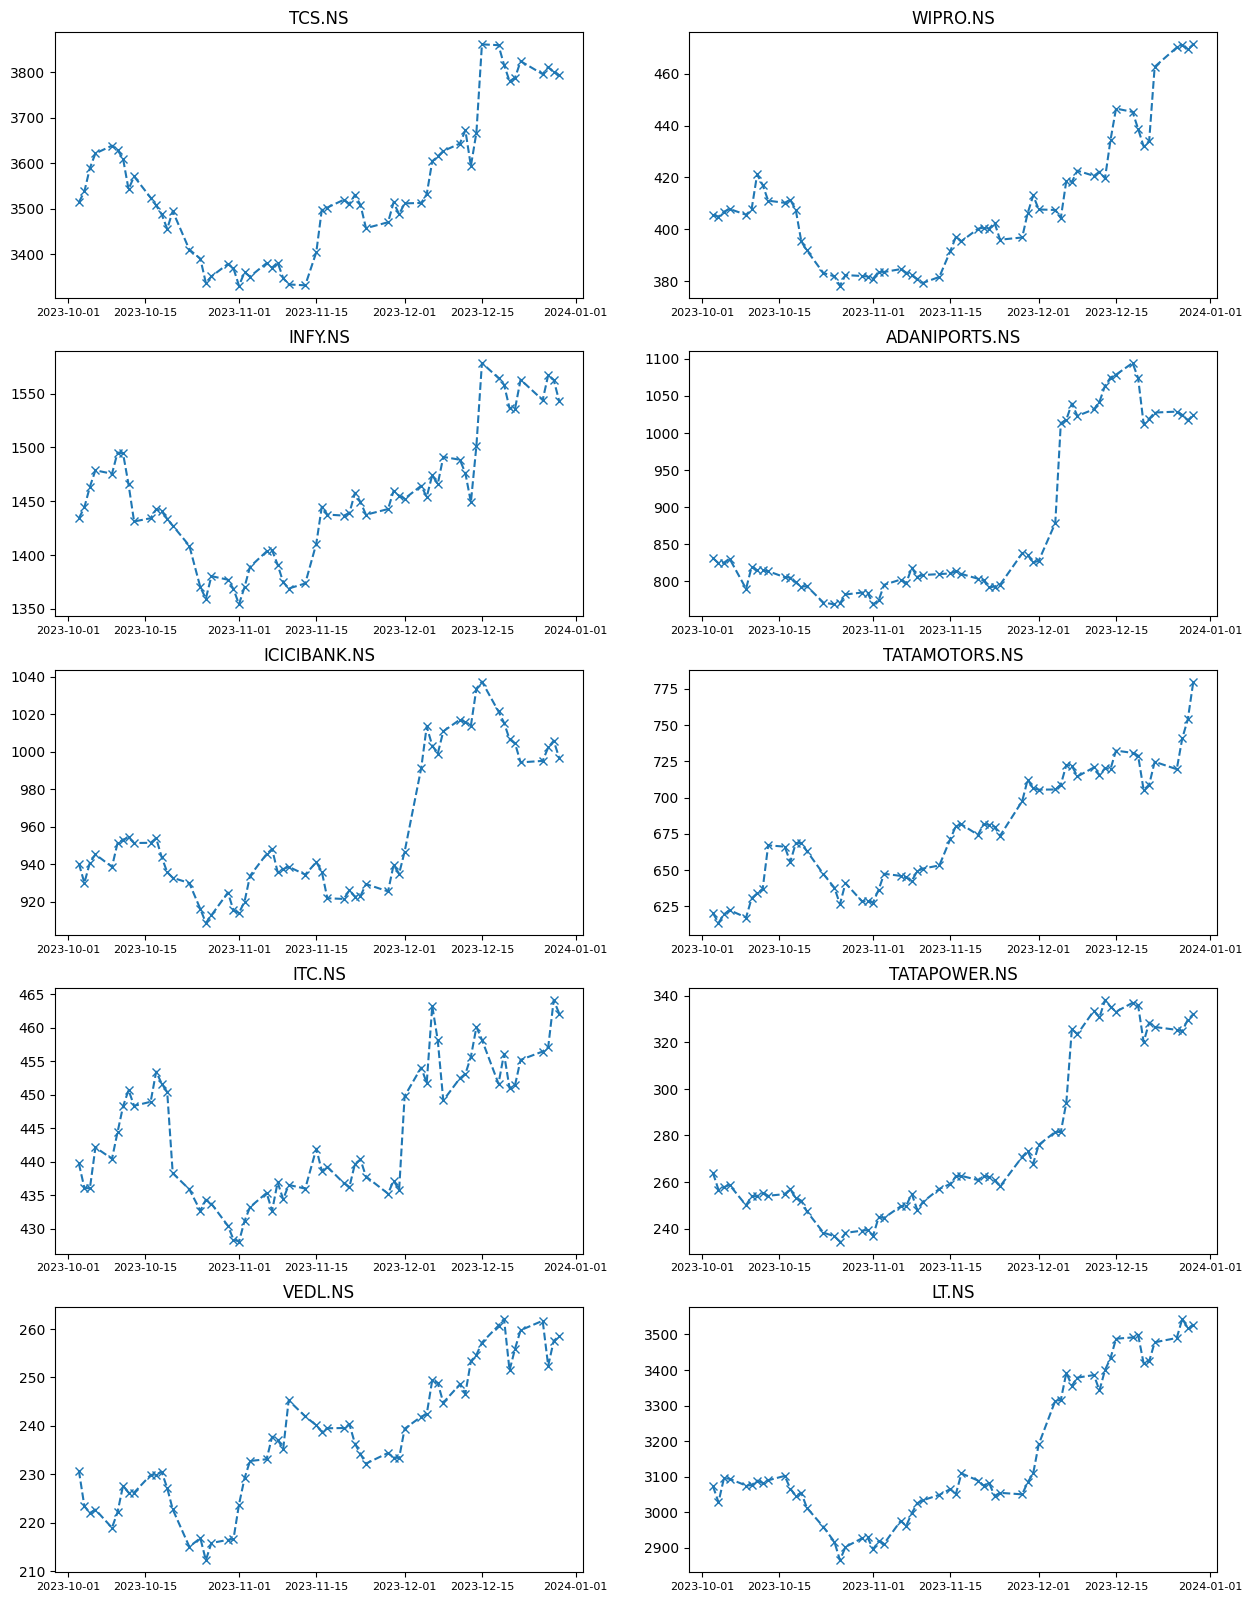

In [ ]:
# Plot the closing prices for each stock
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axs = axs.flatten()
for i, ticker in enumerate(stocks):
    axs[i].plot(df.index, df[ticker],linestyle='dashed',marker='x')
    axs[i].set_title(ticker)
    axs[i].xaxis.set_tick_params(labelsize=8)


plt.show()

# Calculate the simple returns for each asset over the chosen period.

In [ ]:
len(returns)

59

In [ ]:
returns.head()

Ticker,ADANIPORTS.NS,ICICIBANK.NS,INFY.NS,ITC.NS,LT.NS,TATAMOTORS.NS,TATAPOWER.NS,TCS.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,
2023-10-04,-0.008179,-0.010901,0.007218,-0.008300,-0.014805,-0.011040,-0.027657,0.006802,-0.031853,-0.001357
2023-10-05,0.000728,0.011612,0.013224,-0.000115,0.022558,0.009778,0.004481,0.014586,-0.006267,0.004693
2023-10-06,0.006726,0.004624,0.010421,0.013989,-0.000759,0.004600,0.003685,0.008929,0.003153,0.002581
2023-10-09,-0.048992,-0.006983,-0.002198,-0.003845,-0.006142,-0.008193,-0.033816,0.004681,-0.016839,-0.005517
2023-10-10,0.037276,0.013424,0.013352,0.008968,0.000423,0.021382,0.015600,-0.002597,0.014615,0.005301


## Stock Return plots

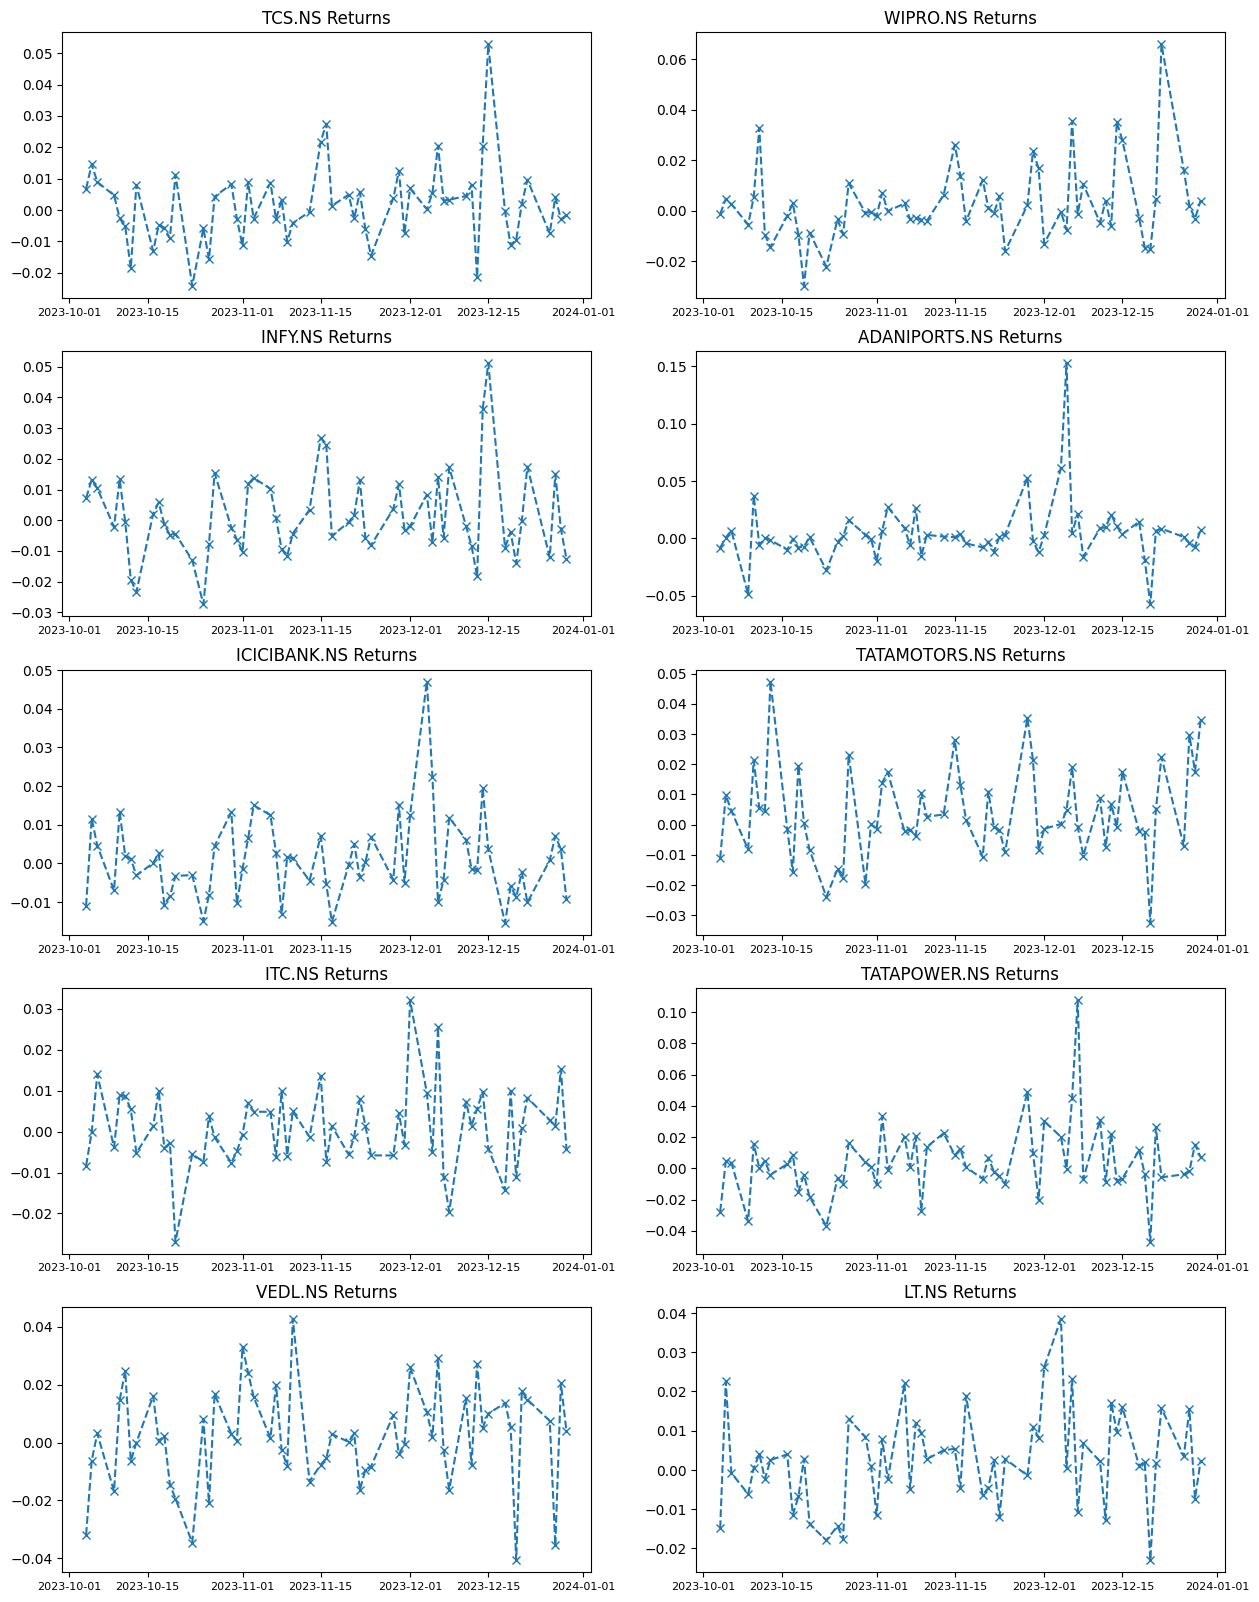

In [ ]:
# Plot the returns for each stock
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axs = axs.flatten()
for i, ticker in enumerate(stocks):
    axs[i].plot(returns.index, returns[ticker],linestyle='dashed',marker='x')
    axs[i].set_title(ticker + ' Returns')
    axs[i].xaxis.set_tick_params(labelsize=8)

plt.show()

## Return and Risk

In [ ]:
print("Returns\n")
returns.mean()

Returns



Ticker
ADANIPORTS.NS    0.003887
ICICIBANK.NS     0.001042
INFY.NS          0.001337
ITC.NS           0.000887
LT.NS            0.002404
TATAMOTORS.NS    0.003999
TATAPOWER.NS     0.004155
TCS.NS           0.001373
VEDL.NS          0.002075
WIPRO.NS         0.002671
dtype: float64

In [ ]:
print("Variance\n")
returns.var()

Variance



Ticker
ADANIPORTS.NS    0.000734
ICICIBANK.NS     0.000116
INFY.NS          0.000196
ITC.NS           0.000094
LT.NS            0.000146
TATAMOTORS.NS    0.000234
TATAPOWER.NS     0.000525
TCS.NS           0.000155
VEDL.NS          0.000294
WIPRO.NS         0.000241
dtype: float64

In [ ]:
print("Correlation\n")
returns.corr()

Correlation



Ticker,ADANIPORTS.NS,ICICIBANK.NS,INFY.NS,ITC.NS,LT.NS,TATAMOTORS.NS,TATAPOWER.NS,TCS.NS,VEDL.NS,WIPRO.NS
Ticker,,,,,,,,,,
ADANIPORTS.NS,1.000000,0.450489,0.081030,0.093097,0.269799,0.282385,0.414148,0.155768,0.279773,0.065016
ICICIBANK.NS,0.450489,1.000000,0.369782,0.243385,0.444006,0.094805,0.130278,0.174803,0.152628,0.092942
INFY.NS,0.081030,0.369782,1.000000,0.212700,0.378179,0.298873,0.115442,0.749137,0.050399,0.610566
ITC.NS,0.093097,0.243385,0.212700,1.000000,0.441329,0.232146,0.298772,0.071769,0.442544,0.255114
LT.NS,0.269799,0.444006,0.378179,0.441329,1.000000,0.370711,0.316441,0.334986,0.361170,0.336377
TATAMOTORS.NS,0.282385,0.094805,0.298873,0.232146,0.370711,1.000000,0.350132,0.354527,0.322887,0.313617
TATAPOWER.NS,0.414148,0.130278,0.115442,0.298772,0.316441,0.350132,1.000000,0.192867,0.469686,0.132716
TCS.NS,0.155768,0.174803,0.749137,0.071769,0.334986,0.354527,0.192867,1.000000,0.060641,0.541016
VEDL.NS,0.279773,0.152628,0.050399,0.442544,0.361170,0.322887,0.469686,0.060641,1.000000,0.273516


# Markowitz's mean-variance optimization

In [ ]:
O = np.ones(N)
O

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
M = np.array(returns.mean())
M

array([0.00388665, 0.00104248, 0.00133703, 0.00088679, 0.00240363,
       0.00399915, 0.00415492, 0.00137349, 0.00207464, 0.00267072])

In [ ]:
C = np.array(returns.cov())
C

array([[7.33560180e-04, 1.31391147e-04, 3.07588036e-05, 2.44745825e-05,
        8.84420076e-05, 1.16881730e-04, 2.57027438e-04, 5.24451251e-05,
        1.29953399e-04, 2.73576012e-05],
       [1.31391147e-04, 1.15965497e-04, 5.58106332e-05, 2.54403160e-05,
        5.78699564e-05, 1.56020560e-05, 3.21469593e-05, 2.34003187e-05,
        2.81878652e-05, 1.55494877e-05],
       [3.07588036e-05, 5.58106332e-05, 1.96432504e-04, 2.89359307e-05,
        6.41510422e-05, 6.40149687e-05, 3.70745310e-05, 1.30519634e-04,
        1.21140607e-05, 1.32947746e-04],
       [2.44745825e-05, 2.54403160e-05, 2.89359307e-05, 9.42166083e-05,
        5.18473403e-05, 3.44360769e-05, 6.64521944e-05, 8.65983818e-06,
        7.36687761e-05, 3.84714715e-05],
       [8.84420076e-05, 5.78699564e-05, 6.41510422e-05, 5.18473403e-05,
        1.46487267e-04, 6.85682324e-05, 8.77604118e-05, 5.04003807e-05,
        7.49677895e-05, 6.32511255e-05],
       [1.16881730e-04, 1.56020560e-05, 6.40149687e-05, 3.44360769e-05,
   

In [ ]:
# a = OCiOt
# b = OciMt
# c = MciOt
# d = MciMt

# λ1 = (2bµ - 2d)/(bc - ad)
# λ2 = (2c - 2aµ)/(bc - ad)

# Wt = (λ1/2)CiOt + (λ2/2)CiMt

# Wt = (cCiMt - dCiOt)/(bc - ad) + µ (bCiOt - aCiMt)/(bc - ad)
# W =  (c*MCi - d*OCi)/(bc - ad) + µ (b*OCi - a*MCi)/(bc - ad) , it is of the form :- Wₘᵢₙ = α + µβ


Ci = np.linalg.inv(C)
Mt = M.T
Ot = O.T

a = np.dot(O,np.dot(Ci,Ot))
b = np.dot(O,np.dot(Ci,Mt))

c = np.dot(M,np.dot(Ci,Ot))
d = np.dot(M,np.dot(Ci,Mt))

OCi = np.dot(O,Ci)
MCi = np.dot(M,Ci)

In [ ]:
denom = b*c - a*d

alpha = (c * MCi - d * OCi)/denom
beta = ( b * OCi - a * MCi)/denom

In [ ]:
print("Wₘᵢₙ = α + µβ\n")
print("α =",alpha)
print()
print("β =",beta)

Wₘᵢₙ = α + µβ

α = [-0.07893244  0.48310779 -0.19285679  0.62057752 -0.19570523 -0.08578831
 -0.08280297  0.54703334  0.07390918 -0.08854208]

β = [  24.79858784  -62.98887162  -23.32092919 -187.99885326  122.67989283
  149.95550593   64.96136905 -158.94707591  -53.28110845  124.14148278]


# Calculating coeffecients of relation between µ and σ²


## σ²ₘᵢₙ = aµ² + bµ + c

In [ ]:
# Wₘᵢₙ = α + µβ
# σ² = WCWt -> µ²(βCβt) + µ(βCαt + αCβt) + αCαt

a = np.dot(beta,np.dot(C,beta.T))
b = np.dot(beta,np.dot(C,alpha.T)) + np.dot(alpha,np.dot(C,beta.T))
c = np.dot(alpha,np.dot(C,alpha.T))

print(f"σ²ₘᵢₙ  =  {'{0:.6f}'.format(a)}µ² + {'{0:.6f}'.format(b)}µ + {'{0:.6f}'.format(c)}")

σ²ₘᵢₙ  =  13.958646µ² + -0.032891µ + 0.000066


# Markowitz Curve

In [ ]:
Ns = 100000

Ws = np.random.uniform(low=-1, high=1, size=(Ns, N))
random_sums = np.sum(Ws, axis=1)
Ws = Ws/random_sums[:, None]

X = np.zeros(Ns)
for i in range(Ns):
    X[i] = np.matmul(np.matmul(Ws[i], C), Ws[i].T)

Y = np.zeros(Ns)
for i in range(Ns):
    Y[i] = np.matmul(M, Ws[i].T)

MAX_RETURN = max(M.max(),abs(M.min()))

indices = np.where((Y >= -MAX_RETURN))[0]

X = X[indices]
Y = Y[indices]
indices = np.where((X >= 0) & (X <= 0.0003))[0]
X = X[indices]
Y = Y[indices]

Text(0.5, 1.0, 'Matkowitz Curve')

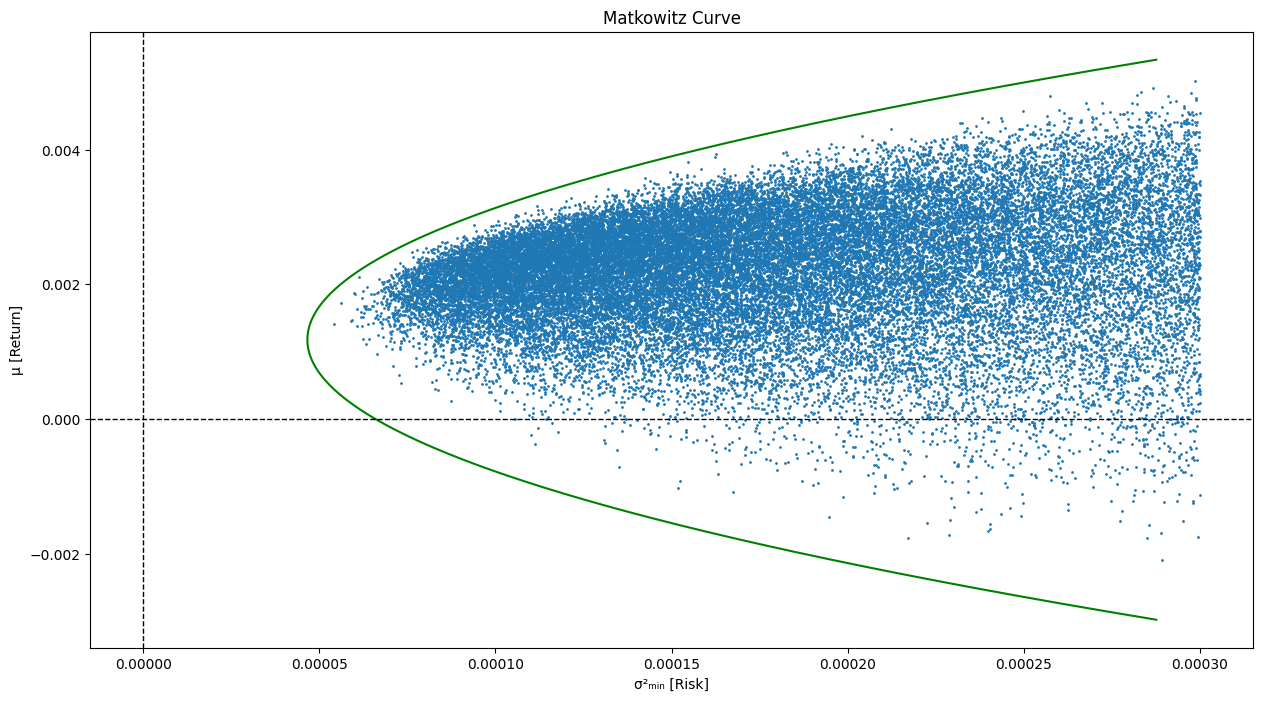

In [ ]:
MAX_RETURN = max(M.max(),abs(M.min()))
y = np.linspace((-b/(2*a))-MAX_RETURN,(-b/(2*a))+MAX_RETURN,1000)
x = a*y*y + b*y + c

plt.figure(figsize=(15,8))
plt.plot(x,y,color="Green")
plt.scatter(X,Y,s=1)
plt.axhline(0,color='Black',linestyle='--',linewidth=1)
plt.axvline(0,color='Black',linestyle='--',linewidth=1)
plt.xlabel("σ²ₘᵢₙ [Risk]")
plt.ylabel("µ [Return]")
plt.title("Matkowitz Curve")

# Matkowitz Bullet

Text(0.5, 1.0, 'Matkowitz Bullet')

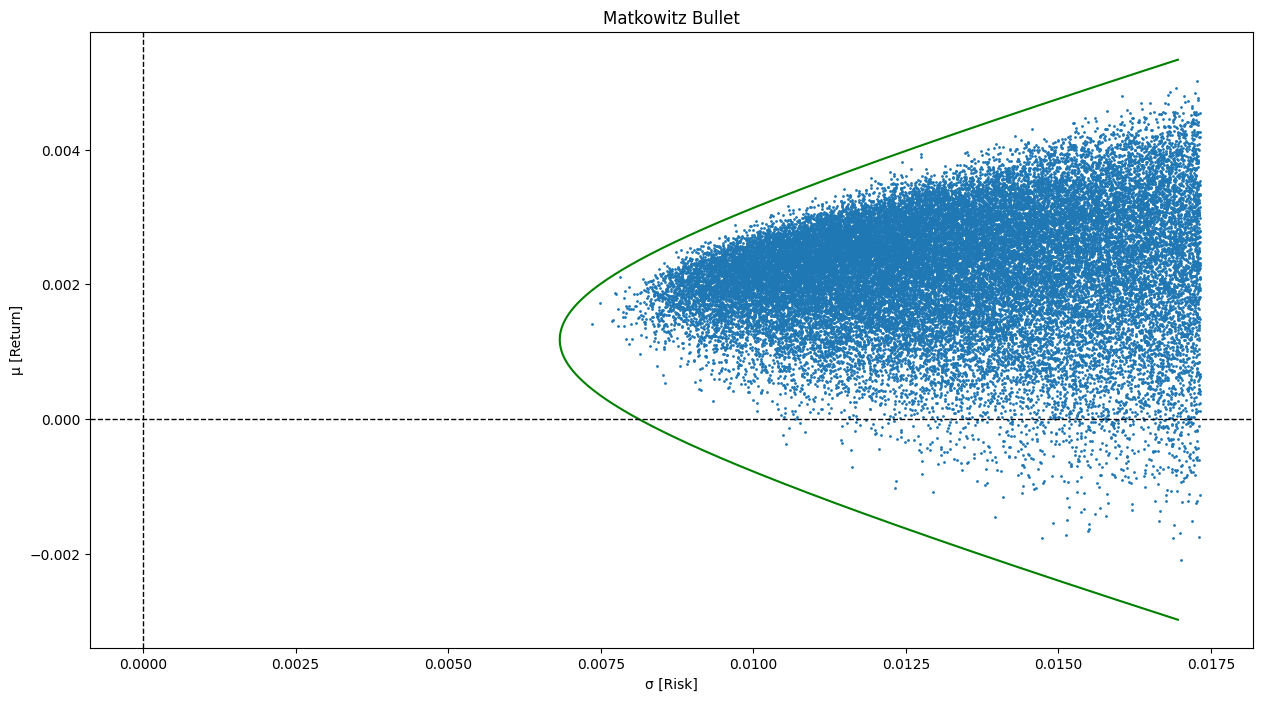

In [ ]:
MAX_RETURN = max(M.max(),abs(M.min()))
y = np.linspace((-b/(2*a))-MAX_RETURN,(-b/(2*a))+MAX_RETURN,1000)
x = np.sqrt(a*y*y + b*y + c)

plt.figure(figsize=(15,8))
plt.plot(x,y,color="Green")
plt.scatter(np.sqrt(X),Y,s=1)
plt.axhline(0,color='Black',linestyle='--',linewidth=1)
plt.axvline(0,color='Black',linestyle='--',linewidth=1)
plt.xlabel("σ [Risk]")
plt.ylabel("µ [Return]")
plt.title("Matkowitz Bullet")

# Matkowitz Effecient Frontier

Text(0.5, 1.0, 'Matkowitz Effecient Frontier')

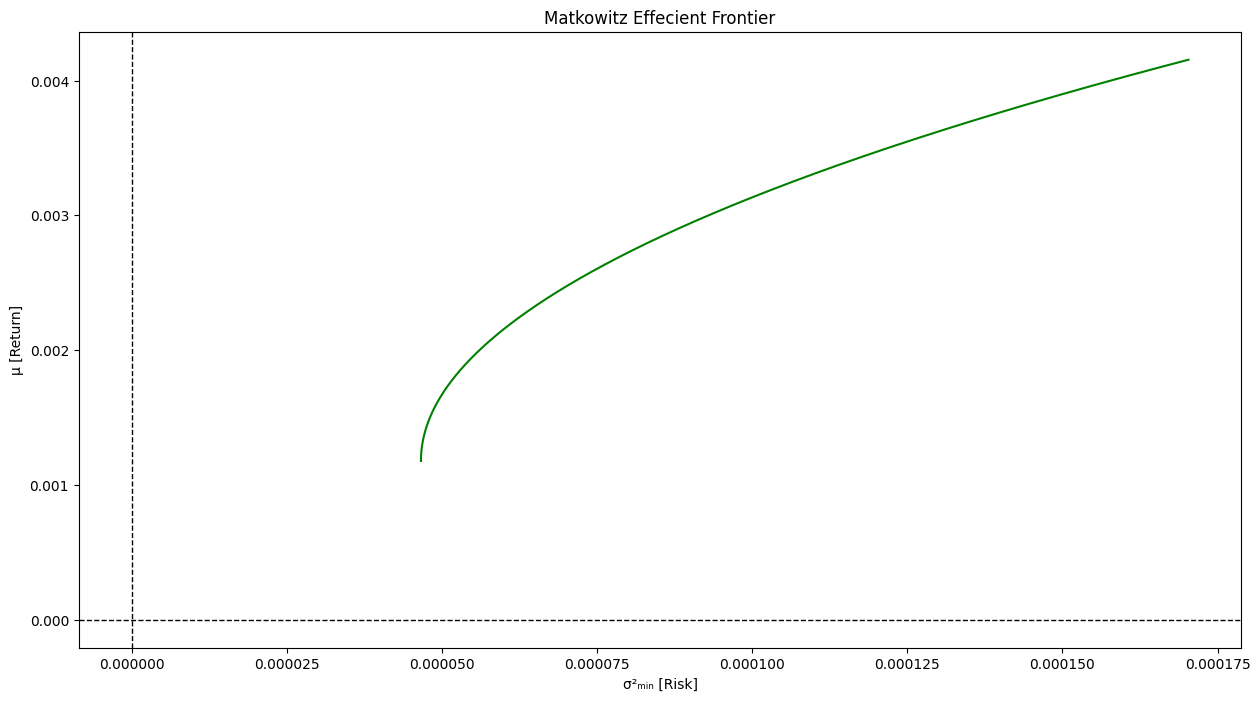

In [ ]:
MAX_RETURN = max(M.max(),abs(M.min()))

# dx/dy = 0 at y = -b/2a

y = np.linspace(-b/(2*a),MAX_RETURN,1000)
x = a*y*y + b*y + c

plt.figure(figsize=(15,8))
plt.plot(x,y,color="Green")
plt.axhline(0,color='Black',linestyle='--',linewidth=1)
plt.axvline(0,color='Black',linestyle='--',linewidth=1)
plt.xlabel("σ²ₘᵢₙ [Risk]")
plt.ylabel("µ [Return]")
plt.title("Matkowitz Effecient Frontier")

# Calculating the Capital market line (CML) equation using CAPM model

## Optimal derived weights

In [ ]:
## W*.T = (Ci (Mt - U_rf * Ot)) / (OCi (Mt - U_rf * Ot))
# where U_rf is the risk free return

W_star_t = np.dot(Ci, Mt - U_rf * Ot) / np.dot(O, np.dot(Ci, Mt - U_rf * Ot))
print("Optimal derived weights :- \n",W_star_t)
print("sum of derived weights :- ",np.sum(W_star_t))

Optimal derived weights :- 
 [ 0.03387344  0.19657877 -0.29894098 -0.23460731  0.36235127  0.59634177
  0.21269871 -0.17599835 -0.16846036  0.47616303]
sum of derived weights :-  1.0


## Optimal derived expected returns and risk

In [ ]:
U_der  = np.dot(M, W_star_t)
sigma_der = np.sqrt(np.dot(W_star_t.T, np.dot(C,W_star_t)))
print("derived return :- ",U_der)
print("derived σ :- ",sigma_der)

derived return :-  0.0045488831940539995
derived σ :-  0.014325522373619762


## Slope of CML

In [ ]:
m  = (U_der - U_rf) / sigma_der
print("Slope of CML line :- ",m)

Slope of CML line :-  0.30447104782453643


## Expected return using CAPM model

In [ ]:
print("Expected return of portfolio using CAPM Model :- ")
print(f"µ  =  {'{0:.6f}'.format(U_rf)} + {'{0:.6f}'.format(m)} σ")

Expected return of portfolio using CAPM Model :- 
µ  =  0.000187 + 0.304471 σ


## Plotting CML and efficient frontier

Text(0.5, 1.0, 'µ vs σₘᵢₙ')

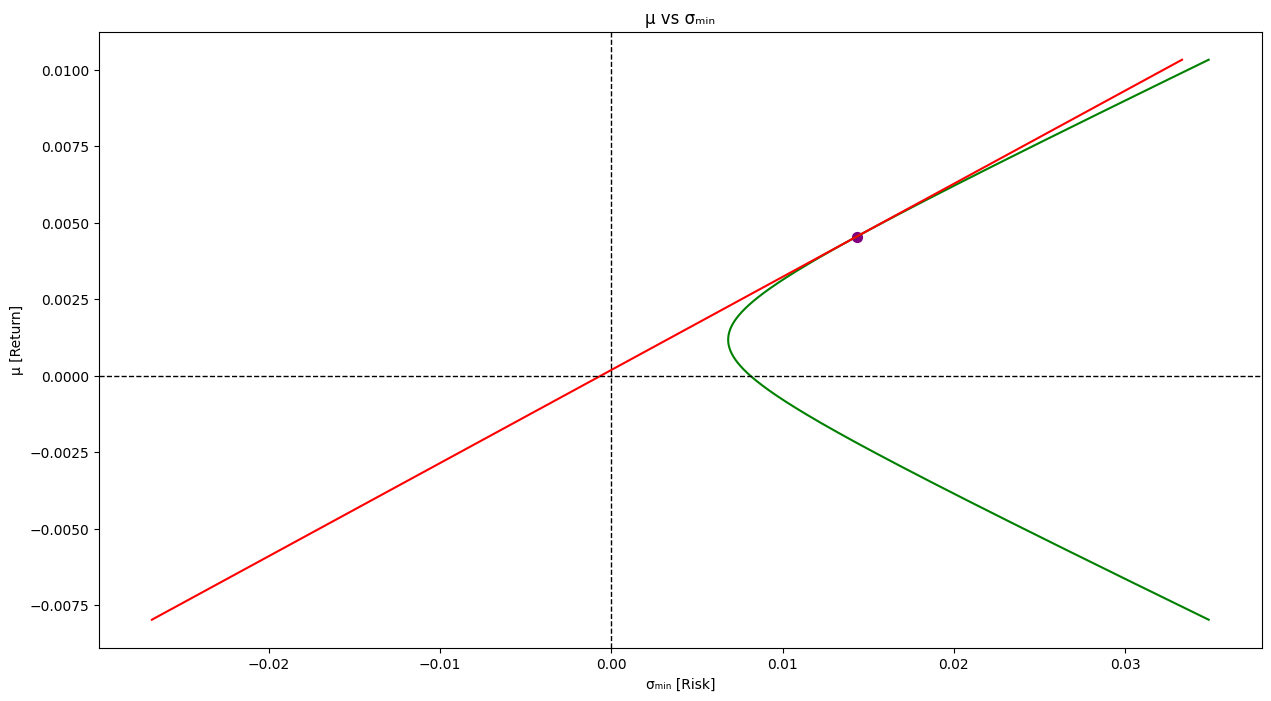

In [ ]:
MAX_RETURN = max(M.max(),abs(M.min()))

y = np.linspace(-b/(2*a) - MAX_RETURN - 0.005, -b/(2*a) + MAX_RETURN + 0.005,1000)
x = np.sqrt(a*y*y + b*y + c)

x1 = (y - U_rf) / m

plt.figure(figsize=(15,8))
plt.plot(x,y,color="Green")
plt.plot(x1, y, color = 'Red')
plt.axhline(0,color='Black',linestyle='--',linewidth=1)
plt.axvline(0,color='Black',linestyle='--',linewidth=1)
plt.scatter([sigma_der],[U_der],color='Purple',s=50)
plt.xlabel("σₘᵢₙ [Risk]")
plt.ylabel("µ [Return]")
plt.title("µ vs σₘᵢₙ")

Text(0.5, 1.0, 'µ vs σₘᵢₙ')

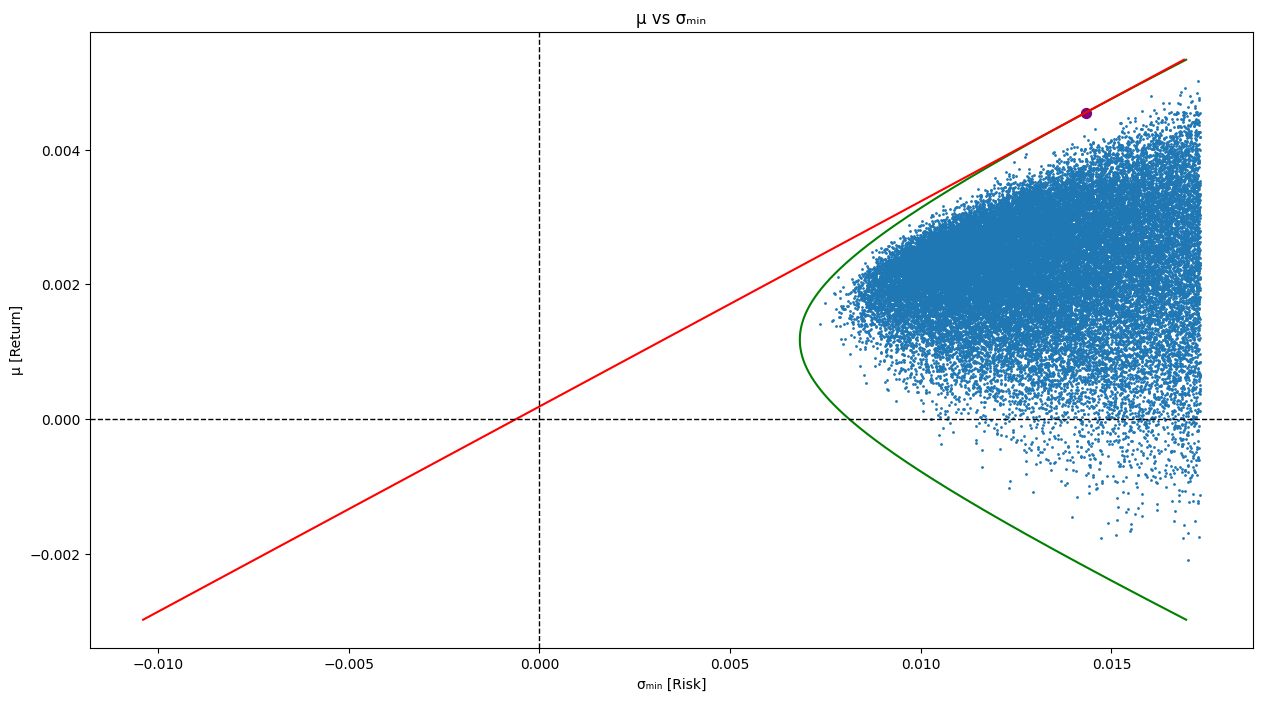

In [ ]:
MAX_RETURN = max(M.max(),abs(M.min()))
y = np.linspace(-b/(2*a) - MAX_RETURN, -b/(2*a) + MAX_RETURN,1000)
x = np.sqrt(a*y*y + b*y + c)
x1 = (y-U_rf)/m
plt.figure(figsize=(15,8))
plt.plot(x,y,color="Green")
plt.plot(x1,y,color="Red")
plt.scatter(np.sqrt(X),Y,s=1)
plt.axhline(0,color='Black',linestyle='--',linewidth=1)
plt.axvline(0,color='Black',linestyle='--',linewidth=1)
plt.scatter([sigma_der],[U_der],color='Purple',s=50)
plt.xlabel("σₘᵢₙ [Risk]")
plt.ylabel("µ [Return]")
plt.title("µ vs σₘᵢₙ")

# Identify the tangency point on efficient frontier where CML touches it.

In [ ]:
print(f"Point of tangency is :- ({sigma_der}, {U_der})")

Point of tangency is :- (0.014325522373619762, 0.0045488831940539995)


In [ ]:
# σ²ₘᵢₙ  =  13.958646µ² + -0.032891µ + 0.000066
print(f"σₘᵢₙ  =  {'({0:.6f}'.format(a)}µ² + {'{0:.6f}'.format(b)}µ + {'{0:.6f}'.format(c)})^(0.5)")
sigma_find = pow(a*(U_der**2) + b*(U_der) + c, 0.5)
print("σ that we got on putting µ in the curve equation - ",sigma_find)
print("As we can see that U_Der is satisfying the curve equation, so it lies on the curve")

σₘᵢₙ  =  (13.958646µ² + -0.032891µ + 0.000066)^(0.5)
σ that we got on putting µ in the curve equation -  0.01432552237361976
As we can see that U_Der is satisfying the curve equation, so it lies on the curve


In [ ]:
# for proving it is tangent we can find derivative at that point and check the slope if it is eqaul to the dervaitive at that point.
print("Slope of CML line :- ",m)

# finding the slope by differeniating the efficient bullet
slope = 2 * np.sqrt(a * (U_der ** 2) + b * U_der + c) / (2 * a * U_der + b)
print(f"Slope obtained by differentiating the efficient bullet at optimal point :- {slope}")
print("Since both the values are equal, this justifies that CML is tangent to the markowitz bullet")

Slope of CML line :-  0.30447104782453643
Slope obtained by differentiating the efficient bullet at optimal point :- 0.30447104782453654
Since both the values are equal, this justifies that CML is tangent to the markowitz bullet


# Choose 3 of your risky assets and calculate individual security market lines.

In [ ]:
print(stocks)

['TCS.NS', 'WIPRO.NS', 'INFY.NS', 'ADANIPORTS.NS', 'ICICIBANK.NS', 'TATAMOTORS.NS', 'ITC.NS', 'TATAPOWER.NS', 'VEDL.NS', 'LT.NS']


In [ ]:
return1 = returns.iloc[:, [0, 4, 9]]

In [ ]:
M1 = np.array(return1.mean())
print("Expected Returns of the stocks in the portfolio :- ",M1)

Expected Returns of the stocks in the portfolio :-  [0.00388665 0.00240363 0.00267072]


In [ ]:
C1 = np.array(return1.cov())
print("Co-variance of the portfolio :- ")
print(C1)

Co-variance of the portfolio :- 
[[7.33560180e-04 8.84420076e-05 2.73576012e-05]
 [8.84420076e-05 1.46487267e-04 6.32511255e-05]
 [2.73576012e-05 6.32511255e-05 2.41369710e-04]]


In [ ]:
O1 = np.ones(3)

In [ ]:
C1i = np.linalg.inv(C1)
M1t = M1.T
O1t = O1.T

In [ ]:
## W*.T = (Ci (Mt - U_rf * Ot)) / (OCi (Mt - U_rf * Ot))
# where U_rf is the risk free return

W_star1_t = np.dot(C1i, M1t - U_rf * O1t) / np.dot(O1, np.dot(C1i, M1t - U_rf * O1t))

print("Optimal derived weights :- \n",W_star1_t)
print("sum of derived weights :- ",round(np.sum(W_star1_t),1))

Optimal derived weights :- 
 [0.17327286 0.47358389 0.35314325]
sum of derived weights :-  1.0


In [ ]:
U1_der  = np.dot(M1, W_star1_t)
sigma_der1 = np.sqrt(np.dot(W_star1_t.T, np.dot(C1,W_star1_t)))

print("derived return :- ",U1_der)
print("derived risk :- ",sigma_der1)

derived return :-  0.002754920710174022
derived risk :-  0.01113549764669353


In [ ]:
m1 = (U1_der - U_rf)
print("Slope of SML line :- ",m1)

Slope of SML line :-  0.0025677443238498717


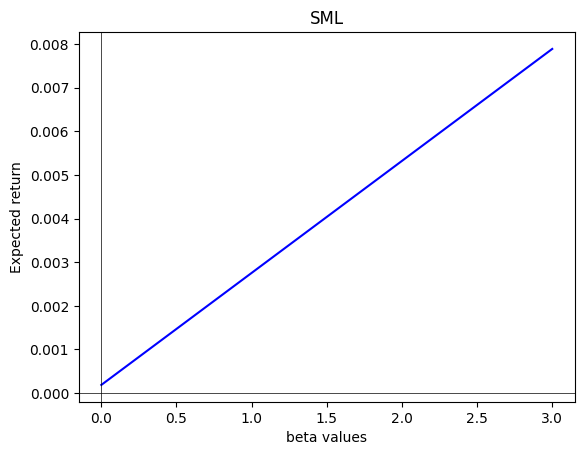

In [ ]:
beta_values = np.linspace(0, 3, 1000)
U_values = m1 * beta_values + U_rf

plt.plot(beta_values, U_values, color='b')
plt.xlabel('beta values')
plt.ylabel('Expected return')
plt.title('SML')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

In [ ]:
E_k = np.zeros(3)

In [ ]:
E_k1 = E_k.copy()
E_k1[0] = 1
E_k2 = E_k.copy()
E_k2[1] = 1
E_k3 = E_k.copy()
E_k3[2] = 1

In [ ]:
beta1 = np.dot(E_k1, np.dot(C1, W_star1_t)) / (sigma_der1 ** 2)
beta2 = np.dot(E_k2, np.dot(C1, W_star1_t)) / (sigma_der1 ** 2)
beta3 = np.dot(E_k3, np.dot(C1, W_star1_t)) / (sigma_der1 ** 2)
print("Beta values of each stock in the portfolio :-")
print(stocks[0] ," :- ", beta1)
print(stocks[4] ," :- ", beta2)
print(stocks[9] ," :- ", beta3)

Beta values of each stock in the portfolio :-
TCS.NS  :-  1.4407494406518815
ICICIBANK.NS  :-  0.8631928609807725
LT.NS  :-  0.9672080395281794


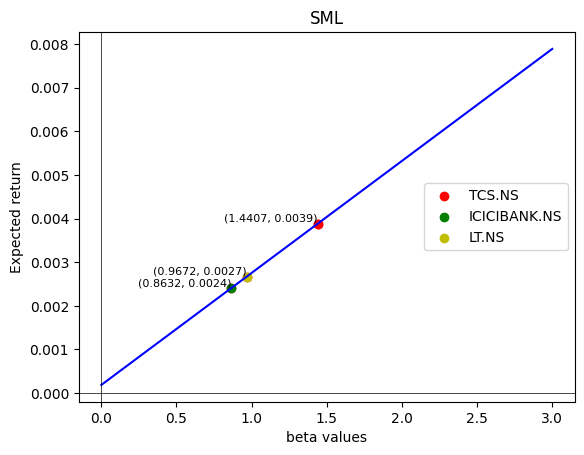

In [ ]:
beta_values = np.linspace(0, 3, 1000)
U_values = m1 * beta_values + U_rf

beta_points = np.array([beta1, beta2, beta3])
U_points = m1 * beta_points + U_rf
point_labels = [stocks[0], stocks[4], stocks[9]]

plt.plot(beta_values, U_values, color='b')
plt.scatter(beta_points, U_points, color='r')

colors = ['r', 'g', 'y']
for i, (x, y, label) in enumerate(zip(beta_points, U_points, point_labels)):
    plt.scatter(x, y, color=colors[i], label=label)
    plt.text(x, y, f'({round(x, 4)}, {round(y, 4)})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

plt.xlabel('beta values')
plt.ylabel('Expected return')
plt.title('SML')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

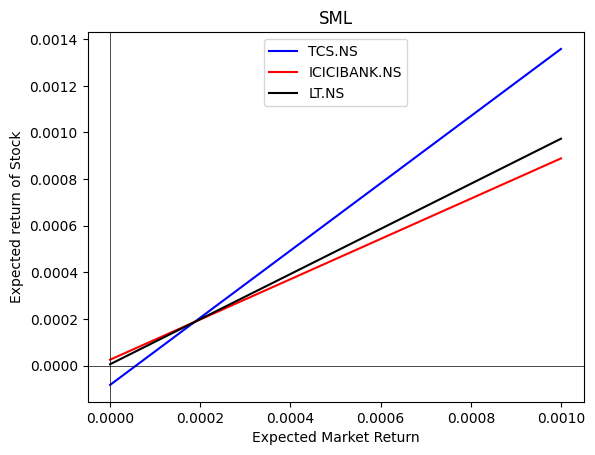

In [ ]:
Um_values = np.linspace(0, 0.001, 1000)
Uk1_values = U_rf + beta1 * (Um_values - U_rf)
Uk2_values = U_rf + beta2 * (Um_values - U_rf)
Uk3_values = U_rf + beta3 * (Um_values - U_rf)

point_labels = [stocks[0], stocks[4], stocks[9]]

plt.plot(Um_values, Uk1_values, color='b', label=stocks[0])
plt.plot(Um_values, Uk2_values, color='r', label=stocks[4])
plt.plot(Um_values, Uk3_values, color='black', label=stocks[9])

plt.xlabel('Expected Market Return')
plt.ylabel('Expected return of Stock')
plt.title('SML')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

# Calculate relevant performance measures

## Sharpe ratio

In [ ]:
def find_portfolio_sharpe_ratio(returns, U_rf):
    n = returns.shape[1]
    M = np.array(returns.mean())
    O = np.ones(n)
    C = np.array(returns.cov())

    Mt = M.T
    Ot = O.T
    Ci = np.linalg.inv(C)

    W_star_t = np.dot(Ci, Mt - U_rf * Ot) / np.dot(O, np.dot(Ci, Mt - U_rf * Ot))
    # print(W_star_t)
    # print(np.sum(W_star_t))

    U_der  = np.dot(M, W_star_t)
    sigma_der = np.sqrt(np.dot(W_star_t.T, np.dot(C,W_star_t)))
    # print(U_der)
    # print(sigma_der)

    sharpe_ratio = (U_der - U_rf) / sigma_der

    sml_slope = U_der - U_rf
    return sharpe_ratio, sml_slope

In [ ]:
def find_stock_sharpe_ratio(returns, U_rf):
    U = returns.mean()
    sigma = np.sqrt(returns.var())

    sharpe_ratio = (U - U_rf) / sigma
    return sharpe_ratio

In [ ]:
print(stocks)

['TCS.NS', 'WIPRO.NS', 'INFY.NS', 'ADANIPORTS.NS', 'ICICIBANK.NS', 'TATAMOTORS.NS', 'ITC.NS', 'TATAPOWER.NS', 'VEDL.NS', 'LT.NS']


In [ ]:
return1 = returns.iloc[:, [0, 3, 4]]
sharpe_ratio1, sml_slope1 = find_portfolio_sharpe_ratio(return1, U_rf)
print("Portfolio stocks :- ", stocks[0],",", stocks[3],",", stocks[4])
print("Sharpe ratio of portfolio 1 :- ", sharpe_ratio1)
print()

lst = [0,3,4]
for i in lst:
    ret = returns.iloc[:, i]
    sharpe_ratio_1_s = find_stock_sharpe_ratio(ret, U_rf)
    print("Sharpe ratio of",stocks[i]," stock :- ", sharpe_ratio_1_s)

Portfolio stocks :-  TCS.NS , ADANIPORTS.NS , ICICIBANK.NS
Sharpe ratio of portfolio 1 :-  0.2044101918788467

Sharpe ratio of TCS.NS  stock :-  0.13659108767945294
Sharpe ratio of ADANIPORTS.NS  stock :-  0.07207677010041207
Sharpe ratio of ICICIBANK.NS  stock :-  0.18313007783876306


In [ ]:
return2 = returns.iloc[:, [1, 5, 6]]
sharpe_ratio2, sml_slope2 = find_portfolio_sharpe_ratio(return2, U_rf)
print("Portfolio stocks :- ", stocks[1],",", stocks[5],",", stocks[6])
print("Sharpe ratio of portfolio 2 :- ", sharpe_ratio2)
print()

lst = [1,5,6]
for i in lst:
    ret = returns.iloc[:, i]
    sharpe_ratio_1_s = find_stock_sharpe_ratio(ret, U_rf)
    print("Sharpe ratio of",stocks[i]," stock :- ", sharpe_ratio_1_s)

Portfolio stocks :-  WIPRO.NS , TATAMOTORS.NS , ITC.NS
Sharpe ratio of portfolio 2 :-  0.2698118976368067

Sharpe ratio of WIPRO.NS  stock :-  0.07942502500716916
Sharpe ratio of TATAMOTORS.NS  stock :-  0.24943782846953474
Sharpe ratio of ITC.NS  stock :-  0.17315623876618616


In [ ]:
return3 = returns.iloc[:, [2,7,8,9]]
sharpe_ratio3, sml_slope3 = find_portfolio_sharpe_ratio(return3, U_rf)
print("Portfolio stocks :- ", stocks[2],",", stocks[7],",", stocks[8],",",stocks[9])
print("Sharpe ratio of portfolio 3 :- ", sharpe_ratio3)
print()

lst = [2,7,8,9]
for i in lst:
    ret = returns.iloc[:, i]
    sharpe_ratio_1_s = find_stock_sharpe_ratio(ret, U_rf)
    print("Sharpe ratio of",stocks[i]," stock :- ", sharpe_ratio_1_s)

Portfolio stocks :-  INFY.NS , TATAPOWER.NS , VEDL.NS , LT.NS
Sharpe ratio of portfolio 3 :-  0.17700403031926565

Sharpe ratio of INFY.NS  stock :-  0.0820421005522471
Sharpe ratio of TATAPOWER.NS  stock :-  0.09543153780864659
Sharpe ratio of VEDL.NS  stock :-  0.11005629048682315
Sharpe ratio of LT.NS  stock :-  0.15985649664465218


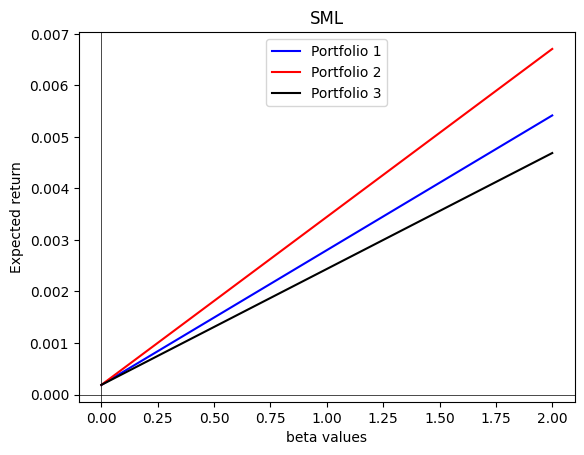

In [ ]:
beta_values = np.linspace(0, 2, 1000)
U1_values = sml_slope1 * beta_values + U_rf
U2_values = sml_slope2 * beta_values + U_rf
U3_values = sml_slope3 * beta_values + U_rf

point_labels = ["Portfolio 1","Portfolio 2","Portfolio 3"]

plt.plot(beta_values, U1_values, color='b', label=point_labels[0])
plt.plot(beta_values, U2_values, color='r', label=point_labels[1])
plt.plot(beta_values, U3_values, color='black', label=point_labels[2])

plt.xlabel('beta values')
plt.ylabel('Expected return')
plt.title('SML')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

In [ ]:
print("Portfolio of 10 assets :- ")
print(stocks)
sharpe_ratio_10_assets, sml_slope4 = find_portfolio_sharpe_ratio(returns, U_rf)
print("Sharpe ratio of the portfolio :- ", sharpe_ratio_10_assets)

Portfolio of 10 assets :- 
['TCS.NS', 'WIPRO.NS', 'INFY.NS', 'ADANIPORTS.NS', 'ICICIBANK.NS', 'TATAMOTORS.NS', 'ITC.NS', 'TATAPOWER.NS', 'VEDL.NS', 'LT.NS']
Sharpe ratio of the portfolio :-  0.30447104782453643


In [ ]:
for i in range(10):
    ret = returns.iloc[:, i]
    sharpe_ratio_1_s = find_stock_sharpe_ratio(ret, U_rf)
    print("Sharpe ratio of",stocks[i]," stock :- ", sharpe_ratio_1_s)

Sharpe ratio of TCS.NS  stock :-  0.13659108767945294
Sharpe ratio of WIPRO.NS  stock :-  0.07942502500716916
Sharpe ratio of INFY.NS  stock :-  0.0820421005522471
Sharpe ratio of ADANIPORTS.NS  stock :-  0.07207677010041207
Sharpe ratio of ICICIBANK.NS  stock :-  0.18313007783876306
Sharpe ratio of TATAMOTORS.NS  stock :-  0.24943782846953474
Sharpe ratio of ITC.NS  stock :-  0.17315623876618616
Sharpe ratio of TATAPOWER.NS  stock :-  0.09543153780864659
Sharpe ratio of VEDL.NS  stock :-  0.11005629048682315
Sharpe ratio of LT.NS  stock :-  0.15985649664465218


## Treynor Ratio

In [ ]:
def find_stock_beta(C, W_star_t, sigma_der, index):
    E_k = np.zeros(len(W_star_t))
    E_k[index] = 1
    beta = np.dot(E_k, np.dot(C, W_star_t)) / (sigma_der ** 2)
    return beta

In [ ]:
def find_stock_treynor_ratio(rp, rf, beta):
    return (rp - rf) / beta

In [ ]:
def find_portfolio_treynor_ratio(returns, U_rf):
    n = returns.shape[1]
    M = np.array(returns.mean())
    O = np.ones(n)
    C = np.array(returns.cov())

    Mt = M.T
    Ot = O.T
    Ci = np.linalg.inv(C)

    W_star_t = np.dot(Ci, Mt - U_rf * Ot) / np.dot(O, np.dot(Ci, Mt - U_rf * Ot))

    U_der  = np.dot(M, W_star_t)
    sigma_der = np.sqrt(np.dot(W_star_t.T, np.dot(C,W_star_t)))

    beta_values = []
    for i in range(n):
        beta_values.append(find_stock_beta(C, W_star_t, sigma_der, i))
    beta_values = np.array(beta_values)

    portfolio_beta = np.dot(W_star_t.T, beta_values)

    portfolio_treynor_ratio = (U_der - U_rf) / portfolio_beta

    stocks_treynor_ratio = []
    for i in range(n):
        # print(M[i], beta_values[i], find_stock_treynor_ratio(M[i], U_rf, beta_values[i]))
        stocks_treynor_ratio.append(find_stock_treynor_ratio(M[i], U_rf, beta_values[i]))
    stocks_treynor_ratio = np.array(stocks_treynor_ratio)

    return portfolio_treynor_ratio, stocks_treynor_ratio

In [ ]:
portfolio_treynor_ratio,stocks_treynor_ratio  = find_portfolio_treynor_ratio(returns, U_rf)
print("Portfolio Treynor Ratio :- ", portfolio_treynor_ratio)
print()
for i in range(10):
    print("Treynor Ratio of",stocks[i]," stock :- ", stocks_treynor_ratio[i])

Portfolio Treynor Ratio :-  0.00436170680772985

Treynor Ratio of TCS.NS  stock :-  0.004361706807729848
Treynor Ratio of WIPRO.NS  stock :-  0.004361706807729847
Treynor Ratio of INFY.NS  stock :-  0.004361706807729851
Treynor Ratio of ADANIPORTS.NS  stock :-  0.004361706807729848
Treynor Ratio of ICICIBANK.NS  stock :-  0.004361706807729849
Treynor Ratio of TATAMOTORS.NS  stock :-  0.004361706807729851
Treynor Ratio of ITC.NS  stock :-  0.004361706807729848
Treynor Ratio of TATAPOWER.NS  stock :-  0.004361706807729852
Treynor Ratio of VEDL.NS  stock :-  0.004361706807729848
Treynor Ratio of LT.NS  stock :-  0.00436170680772985
